In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from xml.etree import ElementTree as ET

plt.style.use('ggplot')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the datasets

In [3]:
df_sales = pd.read_csv('datasets/real_property_sales_and_transfers.csv')

C:\Users\Trent\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_characteristics = pd.read_csv('datasets/real_property_residential_characteristics.csv', error_bad_lines=False)

Skipping line 63332: expected 46 fields, saw 47
Skipping line 63335: expected 46 fields, saw 47
Skipping line 63338: expected 46 fields, saw 47

Skipping line 68348: expected 46 fields, saw 48
Skipping line 69469: expected 46 fields, saw 47
Skipping line 69470: expected 46 fields, saw 47
Skipping line 69471: expected 46 fields, saw 47
Skipping line 69472: expected 46 fields, saw 47



## Filtering the data to only show single family homes

In [5]:
single_family_home_id = '113'
single_family_home_definition = 'SINGLE FAMILY'

df_sales = df_sales[df_sales.D_CLASS == single_family_home_id]

In [6]:
df_characteristics = df_characteristics[df_characteristics.D_CLASS_CN == single_family_home_definition]

## df_sales Data Dictionary

In [7]:
sales_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Sales_Transfers', header=3, parse_cols=[1,2,3,5])
sales_dict

,Field Name,Example,Column Type,Description
0,PIN,163752899,Text,Assessor's Property Identification Number
1,SCHEDNUM,0231416005000,Text,Assessor's Schedule Number
2,RECEPTION_NUM,2011148564,Text,Clerk & Recorder's Reception Number
3,RECEPTION_DATE,20101004,Text,Clerk & Recorder's Reception Date
4,INSTRUMENT,WD,Text,Type of Instrument
5,SALE_YEAR,2010,Text,Sale Year
6,SALE_MONTHDAY,0928,Text,Sale Month/Day
7,SALE_PRICE,199677,Text,Sale Price
8,GRANTOR,"SMITH, JOHN & JANE",Text,Person(s) relinquishing ownership
9,GRANTEE,"BROWN, JAMES",Text,Person(s) recieving ownership


## df_characteristics Data Dictionary

In [8]:
characteristics_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Residential_Characteristics', header=3, parse_cols=[1,2,3,5])
characteristics_dict

,Field Name,Example,Column Type,Description
0,PIN,161714761,Text,Assessor's Property Identification Number
1,SCHEDNUM,0226327008000,Text,Assessor's Schedule Number
2,CD,01,Text,Building Number
3,OFCARD,01,Text,Number of Buildings
4,OWNER,"SMITH, JOHN",Text,Owner
5,CO_OWNER,TYLER,Text,Co-Owner
6,OWNER_NUM,003650,Text,Street Mailing Number
7,OWNER_DIR,S,Text,Street Mailing Direction
8,OWNER_ST,YOSEMITE,Text,Street Mailing Street Name
9,OWNER_TYPE,ST,Text,Street Mailing Type


## Looking at summary statistics and the basic shape of the data

### *df_sales* AKA: the dataset with the home sales info

In [9]:
df_sales.shape

(74221, 16)

In [10]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74221 entries, 38 to 234014
Data columns (total 16 columns):
SCHEDNUM          74221 non-null int64
RECEPTION_NUM     74221 non-null object
INSTRUMENT        74221 non-null object
SALE_YEAR         74221 non-null int64
SALE_MONTHDAY     74221 non-null int64
RECEPTION_DATE    74221 non-null int64
SALE_PRICE        49205 non-null float64
GRANTOR           74221 non-null object
GRANTEE           74221 non-null object
CLASS             74221 non-null object
MKT_CLUS          74212 non-null float64
D_CLASS           74221 non-null object
D_CLASS_CN        74221 non-null object
NBHD_1            74221 non-null int64
NBHD_1_CN         74221 non-null object
PIN               74221 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 9.6+ MB


In [11]:
df_sales.describe()

,SCHEDNUM,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1,PIN
count,74221.000,74221.000,74221.000,74221.000,49205.000,74212.000,74221.000,74221.000
mean,330075024539.497,2011.727,659.805,20118683.769,397982.820,14.462,334.796,161579097.136
std,236122710593.116,2.649,332.157,26522.232,1774349.031,10.053,250.564,930322.051
min,4100122000.000,2008.000,101.000,19900813.000,1.000,1.000,1.000,160431419.000
25%,116507014000.000,2009.000,407.000,20091104.000,75000.000,6.000,109.000,160788104.000
50%,235130011000.000,2012.000,627.000,20120509.000,180500.000,13.000,259.000,161438845.000
75%,523306002000.000,2014.000,923.000,20140911.000,291000.000,23.000,541.000,161976081.000
max,913114011000.000,2016.000,1231.000,20160909.000,33500000.000,56.000,906.000,164094946.000


In [12]:
df_sales.D_CLASS_CN.value_counts()

SINGLE FAMILY    74221
Name: D_CLASS_CN, dtype: int64

### df_characteristics AKA the dataset with the characteristics of the property

In [13]:
df_characteristics.shape

(131640, 46)

In [14]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131640 entries, 0 to 199731
Data columns (total 46 columns):
PIN                 131640 non-null int64
SCHEDNUM            131640 non-null int64
CD                  131640 non-null int64
OFCARD              131640 non-null int64
OWNER               131640 non-null object
CO_OWNER            2651 non-null object
OWNER_NUM           131640 non-null object
OWNER_DIR           70057 non-null object
OWNER_ST            131640 non-null object
OWNER_TYPE          128336 non-null object
OWNER_APT           4717 non-null object
OWNER_CITY          131640 non-null object
OWNER_STATE         131639 non-null object
OWNER_ZIP           131634 non-null object
SITE_NBR            131640 non-null int64
SITE_DIR            74512 non-null object
SITE_NAME           131640 non-null object
SITE_MODE           131597 non-null object
SITE_MORE           1666 non-null object
TAX_DIST            131640 non-null object
PROP_CLASS          131639 non-null float6

In [15]:
df_characteristics.describe()

,PIN,SCHEDNUM,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1
count,131640.000,131640.000,131640.000,131640.000,131640.000,131639.000,131623.000,131640.000,131640.000,131640.000,131640.000,131640.000,131640.000,131625.000,131625.000,131625.000,131625.000,131640.000,131639.000,131639.000,131639.000,131639.000,131639.000,131639.000,131640.000
mean,161537488.304,394367644758.455,1.000,1.003,3600.229,1139.694,6887.374,1489.297,671.046,380.999,38.156,1.290,2.785,1.895,0.316,1951.717,617.746,1.028,154973.288,359238.477,12339.774,28602.435,28502.676,100.683,403.264
std,828544.001,227404572482.925,0.000,0.095,3840.691,473.360,3670.261,782.577,552.216,475.986,156.435,0.454,0.845,0.886,0.500,32.780,925.027,0.286,156798.381,290592.370,12491.455,23143.032,23101.120,2755.916,240.840
min,160431419.000,4100122000.000,1.000,1.000,1.000,1112.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1873.000,0.000,0.000,0.000,34600.000,0.000,2754.000,0.000,0.000,1.000
25%,160871131.000,218411008750.000,1.000,1.000,1357.000,1112.000,5350.000,974.000,0.000,0.000,0.000,1.000,2.000,1.000,0.000,1927.000,0.000,1.000,56200.000,193800.000,4474.000,15426.000,15360.000,0.000,205.000
50%,161442083.000,508509003500.000,1.000,1.000,2747.000,1112.000,6250.000,1245.000,754.000,0.000,0.000,1.000,3.000,2.000,0.000,1953.000,0.000,1.000,96900.000,291400.000,7713.000,23196.000,23150.000,0.000,520.000
75%,161907278.000,530308011250.000,1.000,1.000,4459.000,1112.000,7680.000,1764.000,1051.000,768.000,0.000,2.000,3.000,2.000,1.000,1971.000,1997.000,1.000,218600.000,422350.000,17401.000,33623.000,33580.000,0.000,588.000
max,164095225.000,914505037000.000,1.000,25.000,21680.000,9279.000,366283.000,18231.000,8896.000,7565.000,3350.000,3.000,15.000,9.000,5.000,2016.000,3994.000,10.000,8690200.000,10094600.000,691740.000,803530.000,803530.000,380430.000,906.000


## Looking at one schedule number (piece of property) across all three datasets

In [16]:
df_sales[df_sales.SCHEDNUM == 23307028000]

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN
18205,23307028000,2016099458,WD,2016,722,20160728,330000.000,"WASHINGTON,QUIANA","PHIFER,DONALD & NICOLE",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18206,23307028000,2012005557,SW,2011,1215,20120117,185000.000,NAVY FEDERAL CREDIT UNION,"WASHINGTON,QUIANA",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18207,23307028000,2010142026,QC,2010,1124,20101207,nan,"NADOL,DAVID J & THERESE J","NADOL,THERESE J",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18208,23307028000,2011096228,PT,2011,829,20110829,nan,"NADOL,THERESE J",NAVY FEDERAL CREDIT UNION,R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18209,23307028000,2015111855,QC,2015,807,20150811,1.000,"WASHINGTON,QUIANA","WASHINGTON,QUIANA",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499


In [17]:
df_characteristics[df_characteristics.SCHEDNUM == 23307028000]

,PIN,SCHEDNUM,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,OWNER_APT,OWNER_CITY,OWNER_STATE,OWNER_ZIP,SITE_NBR,SITE_DIR,SITE_NAME,SITE_MODE,SITE_MORE,TAX_DIST,PROP_CLASS,PROPERTY_CLASS,ZONE10,D_CLASS_CN,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,STYLE_CN,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
14053,162802499,23307028000,1,1,"PHIFER,DONALD AND NICOLE",NaN,4063,NaN,JERICHO,ST,NaN,DENVER,CO,80249-8184,4063,NaN,JERICHO,ST,NaN,149C,1112.000,Single Family Residential,R-2-A,SINGLE FAMILY,5406.000,2144,1074,967,0,2.000,TWO-STORY,3,3.000,1.000,2000.000,2004.000,1,37400.000,262200.000,2977.000,20871.000,20870.000,0.000,3,GREEN VALLEY,GREEN VALLEY RANCH FLG #26 B5 L28


## Combining the dataframes

In [18]:
df_denver = df_sales.merge(df_characteristics, how='left', on='SCHEDNUM')

## Looking over the new dataframe for any problems

In [19]:
df_denver.describe()

,SCHEDNUM,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1_x,PIN_x,PIN_y,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y
count,74221.000,74221.000,74221.000,74221.000,49205.000,74212.000,74221.000,74221.000,74194.000,74194.000,74194.000,74194.000,74194.000,74190.000,74194.000,74194.000,74194.000,74194.000,74194.000,74194.000,74177.000,74177.000,74177.000,74177.000,74194.000,74194.000,74194.000,74194.000,74194.000,74194.000,74194.000,74194.000
mean,330075024539.497,2011.727,659.805,20118683.769,397982.820,14.462,334.796,161579097.136,161579011.112,1.000,1.002,4519.297,1114.843,6435.260,1284.232,521.562,292.070,41.326,1.250,2.702,1.739,0.265,1956.389,491.082,1.025,104016.768,254504.728,8281.062,20260.488,20250.631,10.797,334.766
std,236122710593.116,2.649,332.157,26522.232,1774349.031,10.053,250.564,930322.051,930206.256,0.000,0.044,4943.136,151.796,2334.405,521.701,482.291,398.655,157.129,0.432,0.757,0.691,0.450,33.105,861.420,0.249,91550.515,107296.510,7293.350,8547.225,8543.450,690.786,250.587
min,4100122000.000,2008.000,101.000,19900813.000,1.000,1.000,1.000,160431419.000,160431419.000,1.000,1.000,1.000,1112.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1873.000,0.000,0.000,0.000,34600.000,0.000,2754.000,0.000,0.000,1.000
25%,116507014000.000,2009.000,407.000,20091104.000,75000.000,6.000,109.000,160788104.000,160788048.500,1.000,1.000,1636.000,1112.000,5023.500,931.000,0.000,0.000,0.000,1.000,2.000,1.000,0.000,1941.000,0.000,1.000,41200.000,172700.000,3280.000,13747.000,13750.000,0.000,109.000
50%,235130011000.000,2012.000,627.000,20120509.000,180500.000,13.000,259.000,161438845.000,161438896.000,1.000,1.000,3055.000,1112.000,6250.000,1137.000,537.000,0.000,0.000,1.000,3.000,2.000,0.000,1954.000,0.000,1.000,63900.000,227400.000,5094.000,18101.000,18100.000,0.000,259.000
75%,523306002000.000,2014.000,923.000,20140911.000,291000.000,23.000,541.000,161976081.000,161976123.750,1.000,1.000,4891.000,1112.000,7320.000,1499.000,931.000,650.000,0.000,1.500,3.000,2.000,1.000,1980.000,0.000,1.000,136000.000,316200.000,10826.000,25170.000,25170.000,0.000,541.000
max,913114011000.000,2016.000,1231.000,20160909.000,33500000.000,56.000,906.000,164094946.000,164093087.000,1.000,3.000,21649.000,9279.000,89007.000,7004.000,2775.000,2131.000,1814.000,3.000,9.000,9.000,2.000,2016.000,3986.000,9.000,1363400.000,1363800.000,108527.000,116029.000,108560.000,116030.000,906.000


In [20]:
df_denver.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74221 entries, 0 to 74220
Data columns (total 61 columns):
SCHEDNUM            74221 non-null int64
RECEPTION_NUM       74221 non-null object
INSTRUMENT          74221 non-null object
SALE_YEAR           74221 non-null int64
SALE_MONTHDAY       74221 non-null int64
RECEPTION_DATE      74221 non-null int64
SALE_PRICE          49205 non-null float64
GRANTOR             74221 non-null object
GRANTEE             74221 non-null object
CLASS               74221 non-null object
MKT_CLUS            74212 non-null float64
D_CLASS             74221 non-null object
D_CLASS_CN_x        74221 non-null object
NBHD_1_x            74221 non-null int64
NBHD_1_CN_x         74221 non-null object
PIN_x               74221 non-null int64
PIN_y               74194 non-null float64
CD                  74194 non-null float64
OFCARD              74194 non-null float64
OWNER               74194 non-null object
CO_OWNER            1746 non-null object
OWNER_NUM  

## Creating a datetime column from the data and making it the index

In [21]:
days = []
months = []
years = df_denver.SALE_YEAR.astype(str)
datetimes = []

for row in df_denver.SALE_MONTHDAY:
    row = str(row)
    if len(row) < 4:
        row = '0' + row
    days.append(row[:-2])
    months.append(row[2:])
    


In [22]:
df_denver['date'] = years + '-' + months + '-' + days

In [23]:
df_denver['date'] = pd.to_datetime(df_denver['date'], format='%Y-%d-%m')

In [24]:
df_denver.index = df_denver.date

In [25]:
df_denver['year'] = df_denver.index.year
df_denver['month'] = df_denver.index.month
df_denver['day'] = df_denver.index.day

## Ordering the observations by date

In [26]:
df_denver.sort_values('date', inplace=True)

## Different Instrument Types

I'm still looking for a complete list of definitions for the deed instrument types, but the most frequent ones are:

| Code | Deed Instrument Type | Definition |
|------|----------------------|------------|
| WD   | Warranty Deed        | A deed in which the grantor (seller) guarantees that he or she holds clear title to a piece of real estate and has a right to sell it to you. The guarantee is not limited to the time the grantor owned the property - it extends back to the property's origins. |
| QC   | Quitclaim Deed       | A deed given to convey whatever right, title, or interest the grantor may have, if any, in a piece of real property. The grantor does not warrant that he or she does in fact have interest to the property. |
| SW   | Special Warranty     | A deed in which the grantor warrants the title for the period of time in which he held title, but does not warrant it with regard to previous owners. |
| PT   | ???                  | ??? |
| PR   | ???                  | ??? |
| DC   | ???                  | ??? |

Definitions from http://www.ocpafl.org/searches/lookups.aspx/code/deed

Since I'm only interested in houses that my wife and I could potentially afford, I'll filter out any home with a sale price 500,000 or more. I'm also filtering out any homes with a sale price lower than 1000 because it has to be incorrect data.

In [27]:
df_denver = df_denver[(df_denver.SALE_PRICE > 1000) & (df_denver.SALE_PRICE < 500000)]

In [28]:
df_denver.groupby('INSTRUMENT')['SALE_PRICE'].mean().sort_values(ascending=False)

INSTRUMENT
BG   392952.381
AF   346833.333
DD   249218.698
WD   241933.258
CD   235375.000
BK   225000.000
SC   220000.000
PR   216425.439
DF   211782.667
TR   203649.093
CS   199661.590
BS   196910.273
DE   172000.000
PT   170512.491
BF   165000.000
SW   143861.550
SF   127481.000
AD   113066.667
QC   108268.854
Name: SALE_PRICE, dtype: float64

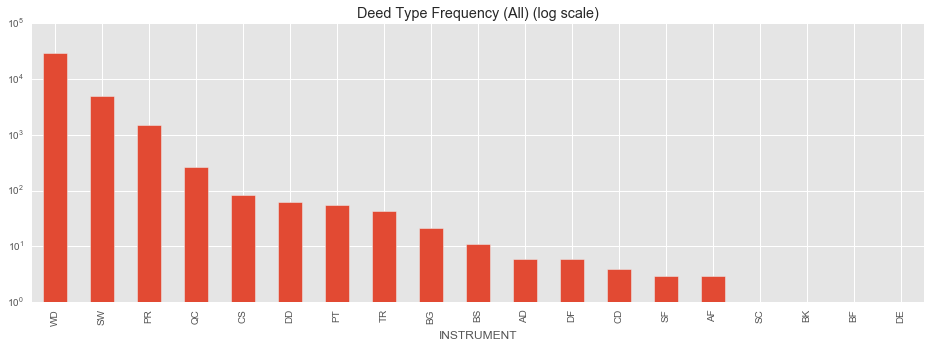

In [29]:
df_denver.groupby('INSTRUMENT').size().sort_values(ascending=False).plot('bar', 
                                                                        figsize=(16,5), 
                                                                        logy=True, 
                                                                        title="Deed Type Frequency (All) (log scale)");

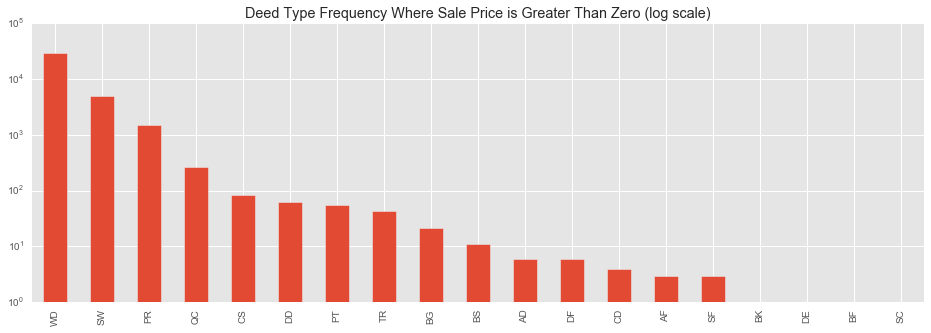

In [30]:
df_denver[df_denver.SALE_PRICE > 0]['INSTRUMENT'].value_counts().plot('bar', figsize=(16,5), logy=True,
                                        title='Deed Type Frequency Where Sale Price is Greater Than Zero (log scale)');

---

# Looking at Mean Sale Prices each Year

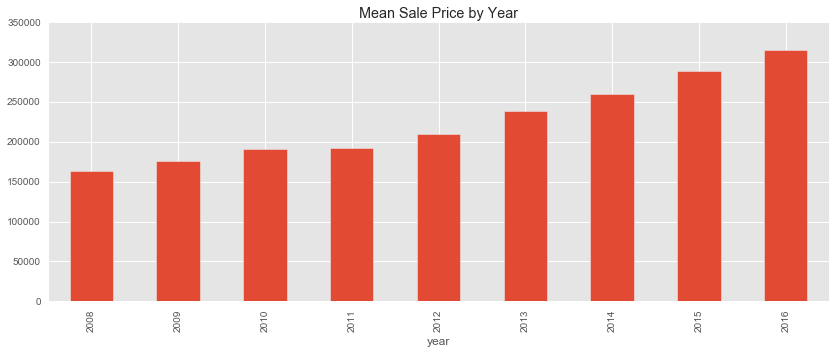

In [31]:
df_sold_houses = df_denver[df_denver.SALE_PRICE > 0]

df_sold_houses.groupby('year')['SALE_PRICE'].mean().plot('bar', figsize=(14,5), title="Mean Sale Price by Year");

## Looking at the transactions by year

In [32]:
df_sold_houses[df_merge.year == 2015].INSTRUMENT.value_counts()

NameError: name 'df_merge' is not defined

In [ ]:
df_yearly_sales = df_merge[['SCHEDNUM']].resample('A').count()

axis = df_yearly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Year")

In [ ]:
df_monthly_sales = df_merge[['SCHEDNUM']].resample('M').count()

axis = df_monthly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Month")

In [ ]:
sales_in_2015 = df_merge[['SCHEDNUM']][(df_merge.year == 2015)].resample('M').count()

axis = sales_in_2015.plot(figsize=(18,5));

axis.set_title("Monthly Home Sales in 2015")

### Looking at different characteristics of homes in Denver

In [ ]:
df_characteristics.info()

In [ ]:
df_characteristics.groupby('BED_RMS').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Bedroom Counts in all Denver Single Family Homes', 
                                                  logy=True);

In [ ]:
df_characteristics.groupby('FULL_B').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Full Bathroom Counts in Denver Single Family Homes', 
                                                  logy=True);

In [ ]:
df_characteristics.groupby('HLF_B').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Half Bathroom Counts in all Denver Single Family Homes', 
                                                  logy=True);

In [ ]:
df_characteristics.groupby('CCYRBLT').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Year All Homes in Denver were Built', 
                                                  logy=True);

In [ ]:
df_pairplot = df_denver[['SALE_PRICE', 'LAND_SQFT', 'AREA_ABG', 'BED_RMS']].dropna()

In [ ]:
sns.pairplot(df_pairplot)

In [ ]:
#keeping this for later

#df_yearly_instruments = df_sales.groupby(['SALE_YEAR', 'INSTRUMENT']).size().unstack().fillna(0)
#top_instruments = df_yearly_instruments.sum().sort_values(ascending=False).head().index